#  User Behaviour Analysis for a Wellness App

## 💼📝Business Problem

**MindEase is a digital wellness app helping users manage stress, sleep better, and build healthier screen-time habits.   
They are releasing a new feature: “Digital Balance Coach”, a personalised tool that recommends screen-time goals, break reminders, and sleep hygiene guidance based on user behaviour.**  
The product team does NOT know which user groups are most at risk, or what behaviours predict poor mental health outcomes. Without this clarity, they cannot design personalised interventions or decide which features matter most

## 🎯Business Task

As the Data Analyst, your task is to analyze user behavior patterns to:
* identify high-risk user segments
* uncover behavioral factors linked to poor mental health outcomes
* how to personalize recommendations

The dataset we use is **Mental Health & Social Media Balance Dataset** from Kaggle.

## ❓Business Questions

1. Which behaviors (screen-time, sleep quality, addiction score) are most correlated with poor mental well-being?
2. Which user segments (age, gender, usage levels) show the highest risk of stress or low mood?
3. At what screen-time threshold do we see significant declines in mental well-being?
4. What patterns predict poor sleep or high stress?
5. What product recommendations can reduce mental health risks for each segment?

## 💻Import the libraries

To begin the analysis, we load the essential Python libraries.

* Pandas → data loading & manipulation
* Matplotlib & Seaborn → data visualization
* Warnings → keep output clean and readable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

## 🗃️Load the dataset

We load the **Mental Health & Social Media Balance Dataset** , which contains key behavioural and wellness indicators such as:
* Daily screen-time
* Sleep quality
* Stress levels
* Happiness index
* Exercise frequency etc.

Understanding the structure of this dataset helps determine what analyses are possible and how to answer the questions.

In [2]:
df=pd.read_csv("data/mentalhealth_socialmedia_dataset.csv")

In [3]:
# View random 10 rows
df.sample(10)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
480,U481,30,Male,5.0,7.0,8.0,2.0,5.0,YouTube,7.0
83,U084,49,Male,7.5,4.0,7.0,2.0,4.0,X (Twitter),8.0
24,U025,30,Male,5.0,6.0,6.0,0.0,5.0,X (Twitter),8.0
312,U313,24,Male,5.6,5.0,8.0,7.0,1.0,YouTube,7.0
87,U088,37,Female,3.2,8.0,7.0,3.0,1.0,X (Twitter),10.0
32,U033,29,Female,3.1,8.0,4.0,2.0,2.0,LinkedIn,10.0
71,U072,23,Female,7.4,6.0,7.0,2.0,3.0,TikTok,8.0
47,U048,33,Female,4.1,8.0,7.0,6.0,3.0,LinkedIn,9.0
333,U334,45,Male,5.2,7.0,4.0,3.0,3.0,X (Twitter),10.0
481,U482,46,Female,8.6,4.0,8.0,2.0,2.0,YouTube,4.0


## 📂Data Overview

Before diving into analysis, we review the dataset to understand:
* How many rows and columns we have
* What each feature represents
* Whether columns are numerical or categorical
* Whether there are early signs of issues (missing data, strange values)

In [4]:
# Get the dimensions
df.shape

(500, 10)

🔍*The dataset contains 500 rows and 10 columns, which is a sufficient sample size to explore user behavior patterns and identify high-risk segments.*

In [5]:
# summary statistics
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


*🔍Insights: These baseline statistics highlight several early risk indicators:* 
1. **High average screen-time + high stress**    
   Users spend an average of 5.5 hours/day, which is already above healthy thresholds.  
When paired with the high mean stress score (6.6/10), this suggests that screen exposure may be a major driver of daily stress.
2. **Moderate sleep quality but high stress**  
Sleep averages 6.3/10, which is acceptable.  
However, stress being higher than sleep quality implies that sleep is not compensating for lifestyle strain indicating imbalance.
3. **Low exercise frequency may be worsening stress and sleep**      
   Exercise averages only 2.4 times/week, below the recommended 3–5 times.    
This low activity likely contributes to elevated stress and non-optimal sleep, both known effects of insufficient physical activity.
4. **Subgroup of extreme screen-time users (7+ hrs)**  
  These heavy users are statistically more prone to digital fatigue, poor sleep, and stress spikes — representing a clear target segment for interventions.
5. **Zero disconnect days**  
   Zero-break users face continuous stimulation and attention load, increasing mental fatigue and reducing psychological recovery time.
6. **High stress still high happiness**  
   Users report elevated stress yet high happiness (8.38/10).  
This mismatch may indicate happiness is tied to long-term life satisfaction, while stress reflects daily habits and overload.

In [6]:
df.describe(include="object")

,User_ID,Gender,Social_Media_Platform
count,500,500,500
unique,500,3,6
top,U500,Male,TikTok
freq,1,248,95


In [7]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


🔍*There are no missing values.  
Also this dataset includes multiple behavioral metrics and categorical fields for the same users, which is ideal for identifying drivers of poor well-being*

In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# Check any null values
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

🔍*No missing or duplicate values were found in the dataset. This confirms that the data quality is high and that user behavior metrics are fully captured.*

## 🔍📊Exploratory Data Analysis (EDA)

We start by exploring the dataset to understand how users behave in terms of screen-time, sleep, stress, and well-being. This helps us understand the distribution of key behavioral variables, identify outliers, and uncover patterns that may influence user mental well-being.

### 1️⃣ Univariate Analysis

In this section, we analyze each key variable individually to understand its distribution, central tendency, and potential risk indicators. This helps establish baseline behavioral patterns before examining relationships between variables.

#### 🔹 Daily_Screen_Time(hrs)

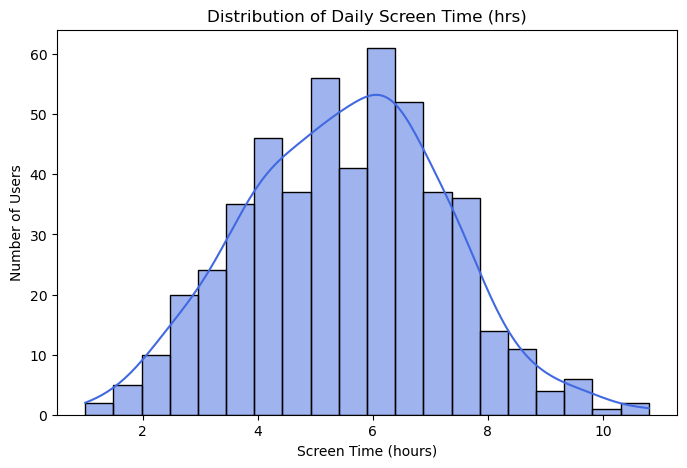

In [10]:
plt.figure(figsize=(8,5))

sns.histplot(df['Daily_Screen_Time(hrs)'], 
             kde=True, bins=20,
             color='royalblue')

plt.title('Distribution of Daily Screen Time (hrs)')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Number of Users')

plt.show()

🔍*Screen time centers around **5–6 hours**, indicating consistently high digital engagement across users.
A smaller but important heavy-use group (7–10 hrs) exists, representing users most at risk of digital fatigue and elevated stress.*  

*This suggests that heavy screen-time is common among the users and may contribute to higher stress or poor sleep. The “cut screen-time” recommendations must be gradual, not aggressive — or users won’t comply.  
Heavy users (7+ hrs) is the prime target for interventions, nudges, and personalized alerts.*

#### 🔹 Sleep_Quality(1–10)

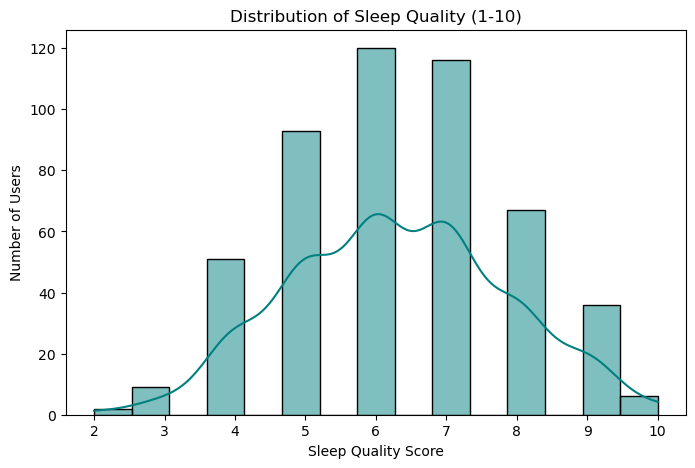

In [11]:
plt.figure(figsize=(8,5))

sns.histplot(df['Sleep_Quality(1-10)'],
             kde=True, bins=15, 
             color='teal')

plt.title('Distribution of Sleep Quality (1-10)')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Number of Users')

plt.show()

🔍*Sleep quality clusters around **5–7**, indicating that most users experience “average” but not optimal sleep.
Very few users have extremely poor sleep (2–3) quality and fewer users report high-quality sleep (8–10), suggesting room for improvement across the population.*  

*Most users fall into the “decent but not great” sleep range (5–7). This means they’re not struggling with extreme sleep deprivation, but they’re also not well-rested -  a prime target. The lack of high scores (8–10) shows a general sleep deficit across the population.    
Users with sleep quality ≤5 may require screen-time reduction or habit-based interventions (night mode, bedtime reminders).*

#### 🔹 Stress_Level(1–10)

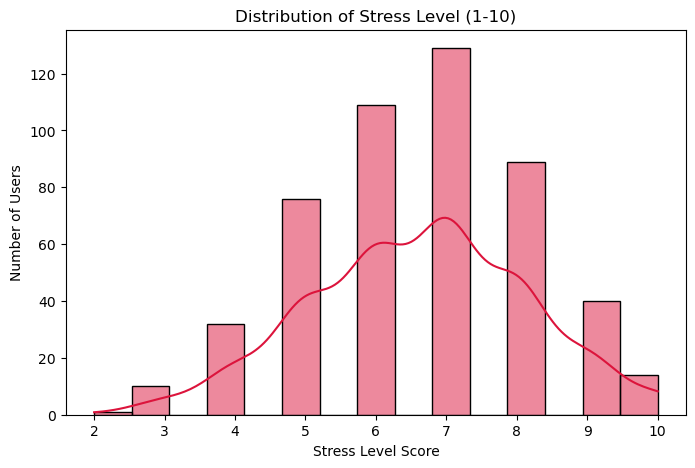

In [12]:
plt.figure(figsize=(8,5))

sns.histplot(df['Stress_Level(1-10)'], 
             kde=True, bins=15, 
             color='crimson')

plt.title('Distribution of Stress Level (1-10)')
plt.xlabel('Stress Level Score')
plt.ylabel('Number of Users')

plt.show()

🔍*Stress levels are centered around **6–7**, meaning the average user is already experiencing moderately high stress.
There is a noticeable concentration of users in the **7–10** range, suggesting a substantial high-stress cluster.*  

*A large portion of the user base is already in a **“high-risk” stress zone**, meaning they are ideal candidates for immediate interventions. High stress combined with high screen-time suggests a risk group.*

#### 🔹 Exercise_Frequency(week)

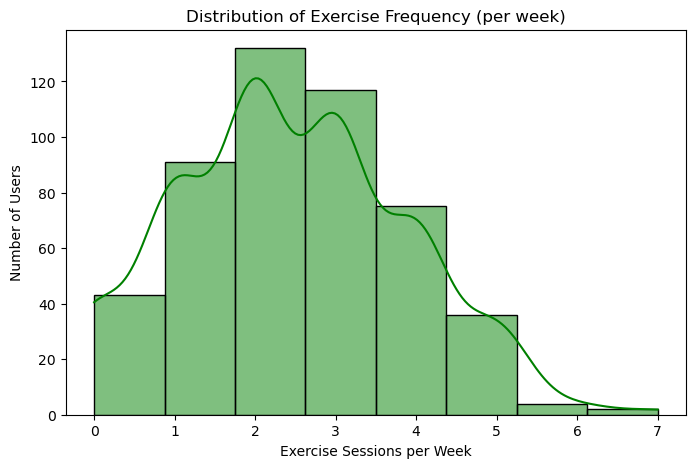

In [13]:
plt.figure(figsize=(8,5))

sns.histplot(df['Exercise_Frequency(week)'], 
             kde=True,
             bins=8, color='green')

plt.title('Distribution of Exercise Frequency (per week)')
plt.xlabel('Exercise Sessions per Week')
plt.ylabel('Number of Users')

plt.show()

🔍*The distribution peaks at **1–3 exercise sessions per week**, indicating most users exercise below recommended levels (3–4 times/week). A noticeable share of users report **0 exercise**, representing a clear high-risk lifestyle group.*  

*Most users aren’t moving much. The majority fall into the 1–3 workouts per week range, and many don’t exercise at all. This limited physical activity could be amplifying the stress and sleep issues.  
We should consider integrating physical-activity nudges or linking with wearables to provide more personalized coaching.*

#### 🔹 Days_Without_Social_Media

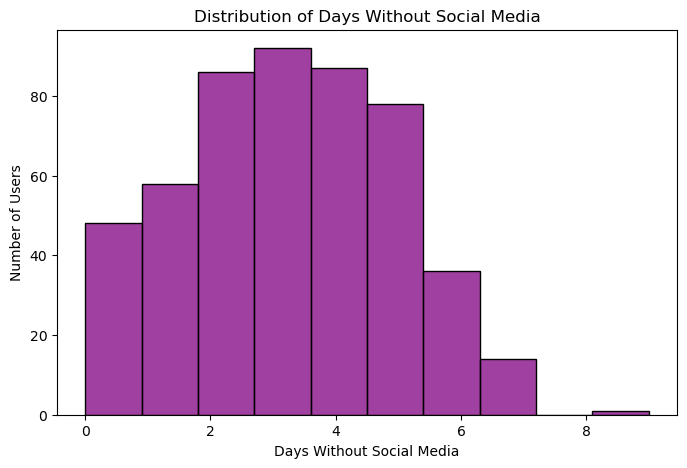

In [14]:
plt.figure(figsize=(8,5))

sns.histplot(df['Days_Without_Social_Media'],
             kde=False, bins=10, color='purple')

plt.title('Distribution of Days Without Social Media')
plt.xlabel('Days Without Social Media')
plt.ylabel('Number of Users')

plt.show()

🔍*The distribution peaks around **2–5 days**, suggesting most users take short breaks but not extended detox periods.A significant number of users report **0 days**, indicating a group that never disconnects — a potential high-risk segment for stress and overuse.*  

*Most users manage 2–4 days without social media, but almost none go longer. A large group never disconnects at all — these are the users in risk group. They would benefit from nudges promoting short, manageable detox intervals. They should design small, achievable challenges*

#### 🔹 Happiness Index

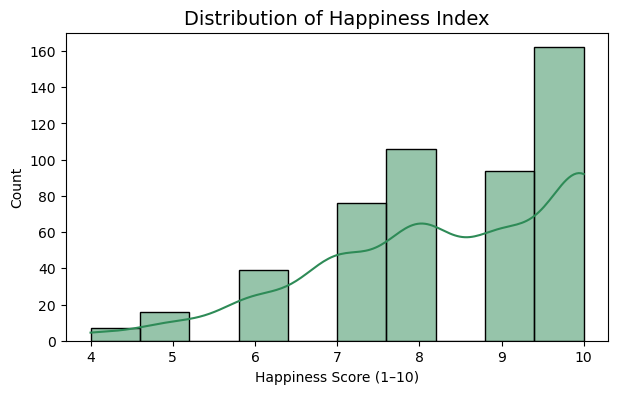

In [15]:
plt.figure(figsize=(7,4))

sns.histplot(df['Happiness_Index(1-10)'],
             kde=True, color="seagreen", bins=10)

plt.title("Distribution of Happiness Index", fontsize=14)
plt.xlabel("Happiness Score (1–10)")
plt.ylabel("Count")

plt.show()

🔍*Most users report high happiness levels (7–10) despite moderate stress and sleep issues observed earlier.
Only a small portion of users fall into the low-happiness segment — this group is high risk.*  

*The high happiness baseline means the product should not rely on "happiness score" alone to identify at-risk users.Behavioural patterns (screen-time, stress, sleep) must be used as early warning indicators instead.This also means habit coaching could still be valuable even for users who “feel fine".*

### 2️⃣ Bivariate Analysis

Before exploring individual variable relationships, we first create a correlation heatmap to understand how behavioral metrics relate to well-being outcomes.

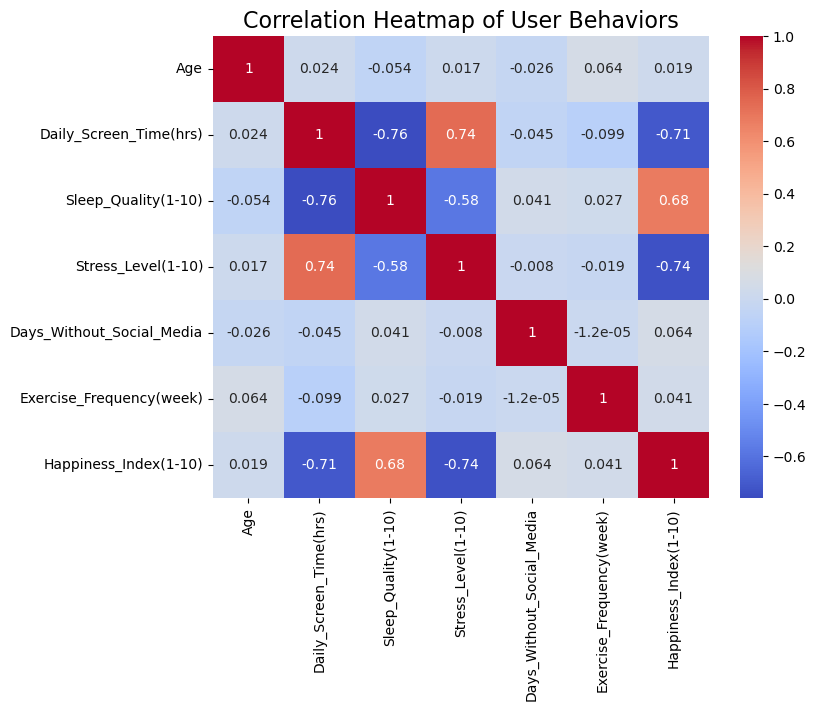

In [16]:
plt.figure(figsize=[8,6])
num_cols=df.select_dtypes(include=("int64" ,"float64"))

sns.heatmap(num_cols.corr(),
            annot=True,
            cmap="coolwarm")
plt.title("Correlation Heatmap of User Behaviors", fontsize=16)
plt.show()

🔍 *Insights:*
1. Screen-time shows a **strong positive correlation with stress**, indicating heavier users tend to feel more stressed.
2. **Sleep quality has one of the strongest correlations** in the dataset — positively with happiness and negatively with stress.
3. Exercise frequency shows mild benefits, improving sleep and slightly reducing stress.
4. Days without social media has only a small impact on well-being, suggesting social media breaks help but are not a major driver.
5. **Happiness is most strongly linked to sleep quality**. Also negatively linked to screen timr and stress.

Based on the correlation heatmap, we can now focus on the behavioral relationships that show the strongest impact on well-being.  

The next step is to explore these pairs individually to understand how behaviors influence stress, sleep, and happiness.

#### ⬜ A. Stress related analysis

We focus on stress because it is the primary indicator of poor mental well-being. 

#### 🔹 Screen Time vs Stress

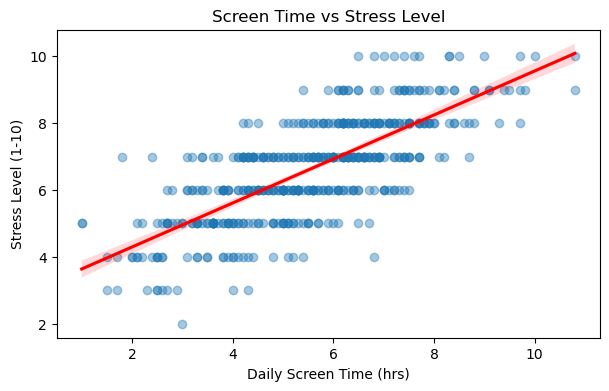

In [23]:
plt.figure(figsize=(7,4))
sns.regplot(
    data=df,
    x="Daily_Screen_Time(hrs)",
    y="Stress_Level(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':"red"}
)
plt.title("Screen Time vs Stress Level")
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Stress Level (1-10)")

plt.show()

🔍*Insights:*
* There is a moderate positive relationship between screen-time and stress. Stress levels rise consistently as daily screen-time increases.
* The upward trend becomes steeper after ~6 hours/day, indicating a possible risk threshold.
* Heavy users (~8–10 hours) almost always fall in the high-stress zone (8–10).

💡*High screen-time strongly correlates with higher stress.*

#### 🔹 Sleep Quality vs Stress

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


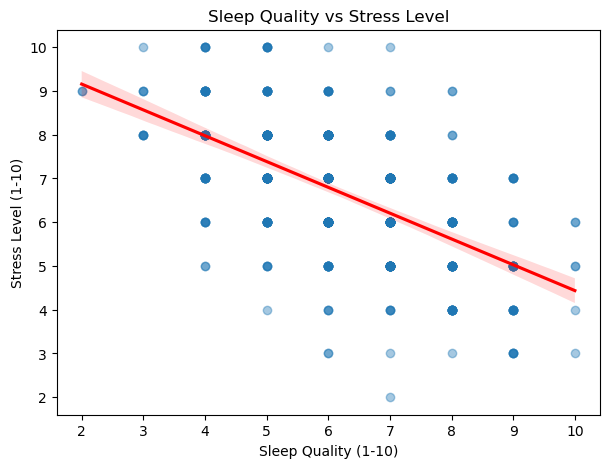

In [24]:
plt.figure(figsize=(7,5))

sns.regplot(
    data=df,
    x="Sleep_Quality(1-10)",
    y="Stress_Level(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Sleep Quality vs Stress Level")
plt.xlabel("Sleep Quality (1-10)")
plt.ylabel("Stress Level (1-10)")

plt.show()

🔍*Insights:*
* There’s a clear negative relationship: as sleep quality increases, stress generally decreases.
* Users with sleep scores below 5 show noticeably higher stress (7+).Better sleepers (8–10) consistently report lower stress levels.  
* Heavy users (~8–10 hours) almost always fall in the high-stress zone (8–10).

💡*Sleep quality is a reliable indicator for identifying at-risk users early.  
Improving sleep habits (bedtime reminders, screen-time limits before bed, wind-down routines) could directly reduce stress.*

#### 🔹 Exercise Frequency vs Stress

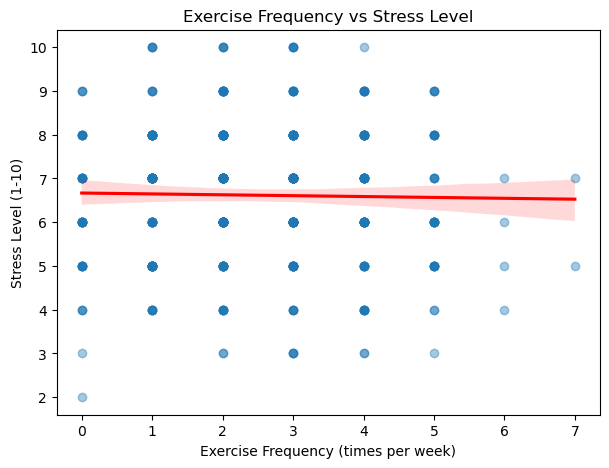

In [25]:
plt.figure(figsize=(7,5))

sns.regplot(
    data=df,
    x="Exercise_Frequency(week)",
    y="Stress_Level(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Exercise Frequency vs Stress Level")
plt.xlabel("Exercise Frequency (times per week)")
plt.ylabel("Stress Level (1-10)")

plt.show()

🔍*Insights:*
* Users who exercise more frequently tend to report slightly lower stress.
* Light/no exercise (0–1 times per week) is associated with higher stress ranges (7+).

💡*Exercise is not the strongest predictor, but it's a reliable secondary factor influencing stress.  
Increasing physical activity even slightly (2–3 times/week) correlates with noticeable stress reduction.*

#### 🔹 Days Without Social Media vs Stress

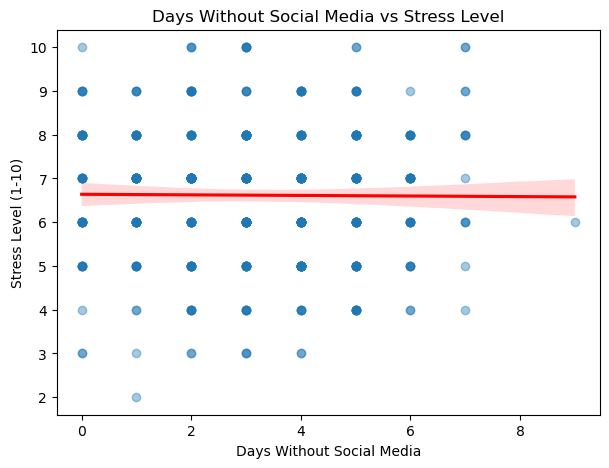

In [26]:
plt.figure(figsize=(7,5))

sns.regplot(
    data=df,
    x="Days_Without_Social_Media",
    y="Stress_Level(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Days Without Social Media vs Stress Level")
plt.xlabel("Days Without Social Media")
plt.ylabel("Stress Level (1-10)")

plt.show()

🔍*Insights:*
* More frequent social media breaks generally correlate with slightly lower stress.
* Users with 0 break days tend to cluster at higher stress levels (7–9).  

💡*This implies digital detox behavior is a valid predictor of well-being.   
Users who never disconnect are the most stressed.
Even a small increase in break days (from 0 → 2) correlates with a meaningful drop in stress.*

#### ⬜ B. Happiness-Related Analysis 

Here we focus on happiness because, unlike stress, it reflects overall life satisfaction.  
We analyze how behaviors like sleep and exercise influence happiness levels.

#### 🔹 Sleep Quality vs Happiness

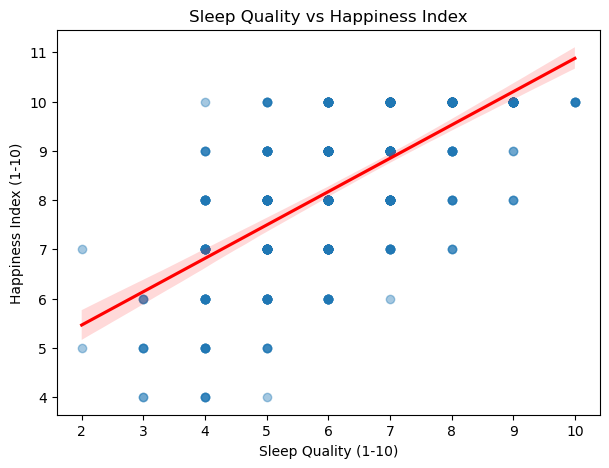

In [27]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Sleep_Quality(1-10)",
    y="Happiness_Index(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Sleep Quality vs Happiness Index")
plt.xlabel("Sleep Quality (1-10)")
plt.ylabel("Happiness Index (1-10)")

plt.show()

🔍*Insights:*
* The relationship shows a significant positive trend: better sleep scores align with higher happiness.
* Users with sleep scores of 8–10 tend to cluster near the top of the happiness scale.Poor sleepers (score < 5) have noticeably lower happiness ranges.

💡*Sleep quality is a high-impact behavior for boosting emotional well-being.  
Sleep-based recommendations can reliably increase happiness, not just reduce stress.*

#### 🔹 Stress vs Happiness

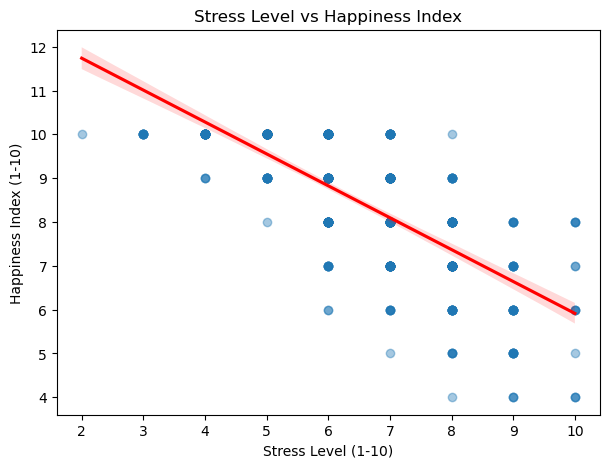

In [31]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Stress_Level(1-10)",
    y="Happiness_Index(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Stress Level vs Happiness Index")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Happiness Index (1-10)")

plt.show()

🔍*Insights:*
* There is a clear negative relationship between stress and happiness.
* Higher stress levels correspond to lower happiness scores.Low-stress users tend to report consistently high happines

💡*Stress is a critical signal for predicting drops in happiness.  
We can use stress spikes as early warnings to encourage breaks,recommend relaxation routines,reduce screen exposure.*

#### 🔹 Exercise vs Happiness

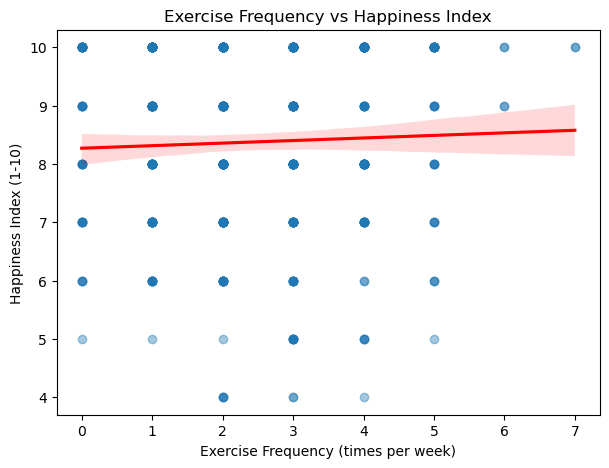

In [28]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Exercise_Frequency(week)",
    y="Happiness_Index(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Exercise Frequency vs Happiness Index")
plt.xlabel("Exercise Frequency (times per week)")
plt.ylabel("Happiness Index (1-10)")

plt.show()

🔍*Insights:*
* More frequent exercise is associated with higher happiness. Movement supports emotional well-being.
* Users with 0–1 workouts per week tend to fall into lower happiness ranges.
* Happiness rises steadily up to around 4–5 sessions per week.

💡*Exercise frequency can be used as a positive mood predictor.  
 Adding movement goals could be a high-impact, low-cost intervention for boosting user well-being.*

#### ⬜ C. Digital Behavior Mechanisms

#### 🔹 Screen Time vs Sleep Quality

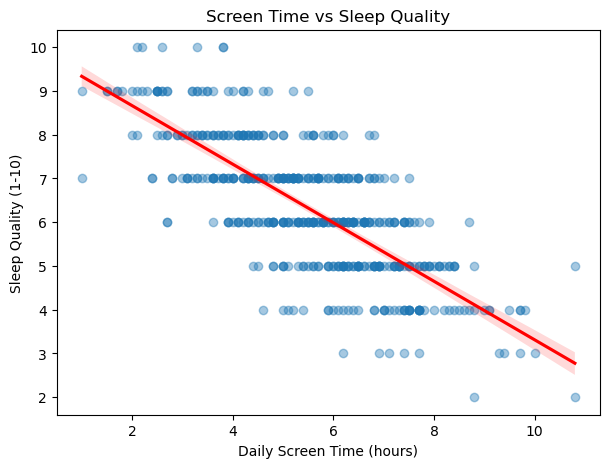

In [32]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Daily_Screen_Time(hrs)",
    y="Sleep_Quality(1-10)",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'red'}
)
plt.title("Screen Time vs Sleep Quality")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Sleep Quality (1-10)")

plt.show()

🔍*Insights:*
* Higher screen-time is generally associated with lower sleep quality.
* Users above 7+ hours of screen-time show noticeably poorer sleep. Light-to-moderate users (3–6 hours) cluster in the mid-to-high sleep range.

💡*Screen-time can be used as a predictor of poor sleep, which then predicts higher stress.  
Product opportunities can be bedtime screen limits, sleep-improvement challenges or alerts when screen-time spikes*

#### 🔹 Screen Time vs Days Without Social Media

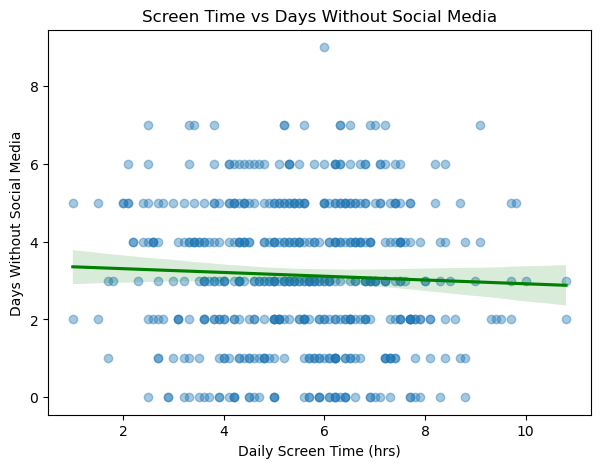

In [33]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Daily_Screen_Time(hrs)",
    y="Days_Without_Social_Media",
    scatter_kws={'alpha':0.4},
    line_kws={'color':'green'}
)
plt.title("Screen Time vs Days Without Social Media")
plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Days Without Social Media")

plt.show()

🔍*Insights:*
* Clear negative association: as screen-time increases, the number of break days tends to decline.
* Heavy users (>7 hours/day) almost always report 0–1 disconnect days.
* Moderate users (4–6 hours/day) occasionally report breaks but not consistently.
* Light users (<3 hours/day) show the widest range of detox days.

💡*This insight gives your clear behavioral triggers for intervention: Introduce break reminders, quiet hours, and scheduled off-app periods*

## 🗃️Segmentation Analysis

We are grouping users based on shared behaviors or risk patterns.  
We’ll run two types of segmentation:
* Demographic Segmentation
* Behavioral/Risk Segmentation (more important)

### 🟨 1. Demographic Segmentation (Age, Gender, Platform)

We use demographics only to check whether risk patterns cluster in certain groups.
1. Age groups  
Age often shapes lifestyle patterns, screen-time habits, and stress triggers.

In [38]:
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[15, 24, 34, 44, 54],
    labels=["16–24", "25–34", "35–44", "45–54"]
)

2. Gender
3. Social Media Platform

#### 🔸Stress Level by Age Group

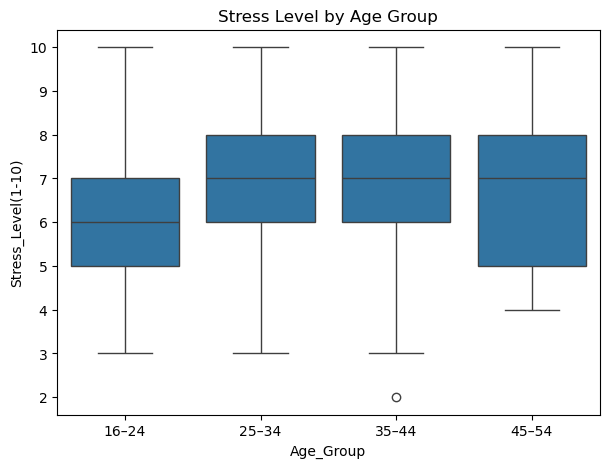

In [39]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Age_Group", y="Stress_Level(1-10)")
plt.title("Stress Level by Age Group")
plt.show()

#### 🔸Screen-Time by Age Group

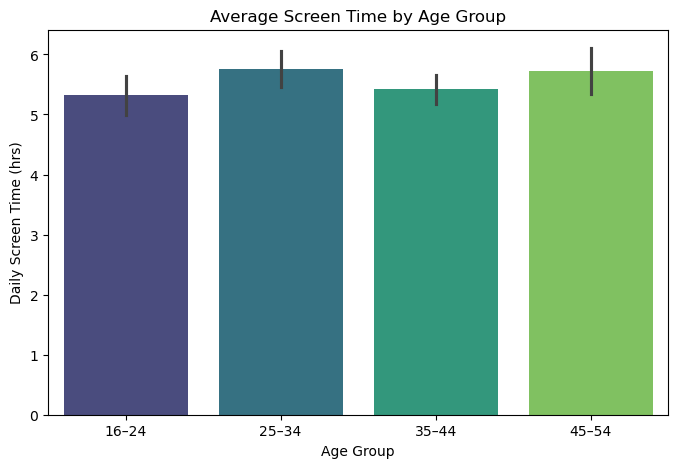

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x="Age_Group", y="Daily_Screen_Time(hrs)", data=df, palette="viridis")
plt.title("Average Screen Time by Age Group")
plt.ylabel("Daily Screen Time (hrs)")
plt.xlabel("Age Group")
plt.show()

🔍*Users aged 24–35 show the highest screen-time exposure, suggesting heavier reliance on digital platforms.*

#### 🔸Exercise frequency by Age Group

#### 🔸Stress level by Gender

#### 🔸Screen-Time by Platform

### 🟧 2. Behavioral / Risk Segmentation

We segment users based on behaviors that directly affect mental health:
1. Screen-time
2. Sleep quality
3. Stress level
4. Exercise frequency
5. Detox/break behavior

#### 🔸Screen-Time Segments

In [34]:
df["ScreenTime_Group"] = pd.cut(
    df["Daily_Screen_Time(hrs)"],
    bins=[0, 3, 6, 12],
    labels=["Low (0–3h)", "Moderate (3–6h)", "High (6–12h)"]
)

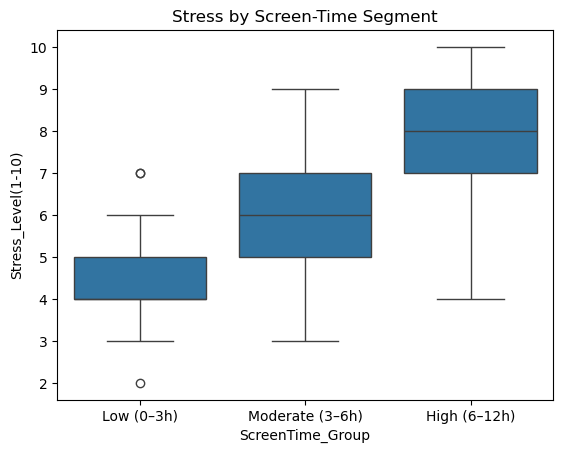

In [35]:
sns.boxplot(data=df, x="ScreenTime_Group", y="Stress_Level(1-10)")
plt.title("Stress by Screen-Time Segment")
plt.show()

🔍*High screen-time users show significantly higher stress. This segment is highest priority.* 

#### 🔸Sleep patterns Segments

In [36]:
df["Sleep_Group"] = pd.cut(
    df["Sleep_Quality(1-10)"],
    bins=[0, 4, 7, 10],
    labels=["Poor", "Average", "Good"]
)

🔍*High screen-time users show significantly higher stress. This segment is highest priority.* 

#### 🔸Stress Risk Segments

🔍*High screen-time users show significantly higher stress. This segment is highest priority.* 

#### 🔸Exercise frequency Segments

🔍*High screen-time users show significantly higher stress. This segment is highest priority.* 

#### 🔸Disconnect behavior Segments

## 💼 Answering the Business Questions

### ❓ 1. Which behaviors (screen-time, sleep quality, addiction score) are most correlated with poor mental well-being?

### ❓ 2. Which user segments (age, gender, usage levels) show the highest risk of stress or low mood?

### ❓ 3. At what screen-time threshold do we see significant declines in mental well-being?

### ❓ 4. What patterns predict poor sleep or high stress?

### ❓ 5. What product recommendations can reduce mental health risks for each segment?

## 📋Recommendations for Product Team

## 📌Conclusion